In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import datasets, metrics, grid_search, cross_validation
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [32]:
data = pd.read_csv('../Final Project/DataScienceFinalProjectValues1YrCSV.csv')


In [33]:
data.head()

,Calender_Year_Year End,Name,Ticker,Primary_Prospectus_Benchmark,#_of_Holdings,Turnover_Ratio,Total_Market_Value,P_B,P_C,P_E,...,Equity_Style_Factor_P_S,Equity_Style_Factor_P_C,Equity_Style_Factor_Div_Yld,Equity_Style_Factor_LT_Earn_Growth,Equity_Style_Factor_Hist_Earn_Growth,Equity_Style_Factor_BV_Growth,Equity_Style_Factor_Sales_Growth,Equity_Style_Factor_CF_Growth,1Yr_Return,1Yr_Return_BM
0,2005,STAAR International,SITIX,MSCI EAFE NR USD,17,16,"4,758,135",2.61,8.51,15.00,...,1.01,5.10,2.72,12.59,18.78,-7.83,6.66,-14.86,21.38,26.34
1,2005,Hartford Schroders International Stk I,SCIEX,MSCI EAFE NR USD,50,126,"7,173,207",3.76,11.13,16.41,...,1.46,11.52,3.81,13.09,22.45,3.97,1.73,1.48,24.46,26.34
2,2005,Sextant International,SSIFX,MSCI EAFE NR USD,59,5,"7,208,690",2.48,9.48,18.89,...,2.42,7.55,1.55,10.45,18.01,7.51,7.00,16.96,22.02,26.34
3,2005,Sit International Growth,SNGRX,MSCI EAFE NR USD,93,28,"31,827,776",1.48,5.23,21.07,...,1.41,10.62,1.79,13.20,22.26,6.14,5.39,10.78,18.19,26.34
4,2005,Cambiar International Equity Inv,CAMIX,MSCI EAFE NR USD,40,63,"32,780,427",2.64,7.72,13.85,...,0.92,5.89,2.20,10.73,12.12,3.26,-4.04,5.15,29.04,26.34


In [34]:
data.shape

(9271, 27)

In [35]:
data.dtypes

Calender_Year_Year End                    int64
Name                                     object
Ticker                                   object
Primary_Prospectus_Benchmark             object
#_of_Holdings                            object
Turnover_Ratio                           object
Total_Market_Value                       object
P_B                                     float64
P_C                                     float64
P_E                                     float64
P_S                                     float64
Debt_to_Capital                         float64
Net_Margin                              float64
ROA                                     float64
ROE                                     float64
Equity_Style_Factor_P_E                 float64
Equity_Style_Factor_P_B                 float64
Equity_Style_Factor_P_S                 float64
Equity_Style_Factor_P_C                 float64
Equity_Style_Factor_Div_Yld             float64
Equity_Style_Factor_LT_Earn_Growth      

In [36]:
#Count number of Nan
data.isnull().sum()

Calender_Year_Year End                    0
Name                                      0
Ticker                                    0
Primary_Prospectus_Benchmark              0
#_of_Holdings                             0
Turnover_Ratio                            0
Total_Market_Value                        0
P_B                                      52
P_C                                     321
P_E                                     130
P_S                                      59
Debt_to_Capital                         207
Net_Margin                               64
ROA                                      52
ROE                                      52
Equity_Style_Factor_P_E                  59
Equity_Style_Factor_P_B                  59
Equity_Style_Factor_P_S                  59
Equity_Style_Factor_P_C                  63
Equity_Style_Factor_Div_Yld              67
Equity_Style_Factor_LT_Earn_Growth       60
Equity_Style_Factor_Hist_Earn_Growth     70
Equity_Style_Factor_BV_Growth   

In [37]:
cleandata =  data

In [40]:
cleandata['P_B'] = cleandata.groupby(['Primary_Prospectus_Benchmark']).P_B.transform(lambda x: x.fillna(x.mean()))
cleandata['P_C'] = cleandata.groupby(['Primary_Prospectus_Benchmark']).P_C.transform(lambda x: x.fillna(x.mean()))
cleandata['P_E'] = cleandata.groupby(['Primary_Prospectus_Benchmark']).P_E.transform(lambda x: x.fillna(x.mean()))
cleandata['P_S'] = cleandata.groupby(['Primary_Prospectus_Benchmark']).P_S.transform(lambda x: x.fillna(x.mean()))
cleandata['Debt_to_Capital'] = cleandata.groupby(['Primary_Prospectus_Benchmark']).Debt_to_Capital.transform(lambda x: x.fillna(x.mean()))
cleandata['Net_Margin'] = cleandata.groupby(['Primary_Prospectus_Benchmark']).Net_Margin.transform(lambda x: x.fillna(x.mean()))
cleandata['ROA'] = cleandata.groupby(['Primary_Prospectus_Benchmark']).ROA.transform(lambda x: x.fillna(x.mean()))
cleandata['ROE'] = cleandata.groupby(['Primary_Prospectus_Benchmark']).ROE.transform(lambda x: x.fillna(x.mean()))
cleandata['Equity_Style_Factor_P_E'] = cleandata.groupby(['Primary_Prospectus_Benchmark']).Equity_Style_Factor_P_E.transform(lambda x: x.fillna(x.mean()))
cleandata['Equity_Style_Factor_P_B'] = cleandata.groupby(['Primary_Prospectus_Benchmark']).Equity_Style_Factor_P_B.transform(lambda x: x.fillna(x.mean()))
cleandata['Equity_Style_Factor_P_S'] = cleandata.groupby(['Primary_Prospectus_Benchmark']).Equity_Style_Factor_P_S.transform(lambda x: x.fillna(x.mean()))
cleandata['Equity_Style_Factor_P_C'] = cleandata.groupby(['Primary_Prospectus_Benchmark']).Equity_Style_Factor_P_C.transform(lambda x: x.fillna(x.mean()))
cleandata['Equity_Style_Factor_Div_Yld'] = cleandata.groupby(['Primary_Prospectus_Benchmark']).Equity_Style_Factor_Div_Yld.transform(lambda x: x.fillna(x.mean()))
cleandata['Equity_Style_Factor_LT_Earn_Growth'] = cleandata.groupby(['Primary_Prospectus_Benchmark']).Equity_Style_Factor_LT_Earn_Growth.transform(lambda x: x.fillna(x.mean()))
cleandata['Equity_Style_Factor_Hist_Earn_Growth'] = cleandata.groupby(['Primary_Prospectus_Benchmark']).Equity_Style_Factor_Hist_Earn_Growth.transform(lambda x: x.fillna(x.mean()))
cleandata['Equity_Style_Factor_BV_Growth'] = cleandata.groupby(['Primary_Prospectus_Benchmark']).Equity_Style_Factor_BV_Growth.transform(lambda x: x.fillna(x.mean()))
cleandata['Equity_Style_Factor_Sales_Growth'] = cleandata.groupby(['Primary_Prospectus_Benchmark']).Equity_Style_Factor_Sales_Growth.transform(lambda x: x.fillna(x.mean()))
cleandata['Equity_Style_Factor_CF_Growth'] = cleandata.groupby(['Primary_Prospectus_Benchmark']).Equity_Style_Factor_CF_Growth.transform(lambda x: x.fillna(x.mean()))

In [41]:
data.isnull().sum()

Calender_Year_Year End                  0
Name                                    0
Ticker                                  0
Primary_Prospectus_Benchmark            0
#_of_Holdings                           0
Turnover_Ratio                          0
Total_Market_Value                      0
P_B                                     0
P_C                                     0
P_E                                     0
P_S                                     0
Debt_to_Capital                         0
Net_Margin                              0
ROA                                     0
ROE                                     0
Equity_Style_Factor_P_E                 0
Equity_Style_Factor_P_B                 0
Equity_Style_Factor_P_S                 0
Equity_Style_Factor_P_C                 0
Equity_Style_Factor_Div_Yld             0
Equity_Style_Factor_LT_Earn_Growth      0
Equity_Style_Factor_Hist_Earn_Growth    0
Equity_Style_Factor_BV_Growth           0
Equity_Style_Factor_Sales_Growth  

In [42]:
cleandata.shape

(9271, 27)

In [44]:
#new columns, return 1 if outperform BM, return 0 if not
cleandata['Beat_BM_1Yr'] = np.where(cleandata['1Yr_Return']> cleandata['1Yr_Return_BM'], 1, 0)

In [45]:
cleandata.head()

,Calender_Year_Year End,Name,Ticker,Primary_Prospectus_Benchmark,#_of_Holdings,Turnover_Ratio,Total_Market_Value,P_B,P_C,P_E,...,Equity_Style_Factor_P_C,Equity_Style_Factor_Div_Yld,Equity_Style_Factor_LT_Earn_Growth,Equity_Style_Factor_Hist_Earn_Growth,Equity_Style_Factor_BV_Growth,Equity_Style_Factor_Sales_Growth,Equity_Style_Factor_CF_Growth,1Yr_Return,1Yr_Return_BM,Beat_BM_1Yr
0,2005,STAAR International,SITIX,MSCI EAFE NR USD,17,16,"4,758,135",2.61,8.51,15.00,...,5.10,2.72,12.59,18.78,-7.83,6.66,-14.86,21.38,26.34,0
1,2005,Hartford Schroders International Stk I,SCIEX,MSCI EAFE NR USD,50,126,"7,173,207",3.76,11.13,16.41,...,11.52,3.81,13.09,22.45,3.97,1.73,1.48,24.46,26.34,0
2,2005,Sextant International,SSIFX,MSCI EAFE NR USD,59,5,"7,208,690",2.48,9.48,18.89,...,7.55,1.55,10.45,18.01,7.51,7.00,16.96,22.02,26.34,0
3,2005,Sit International Growth,SNGRX,MSCI EAFE NR USD,93,28,"31,827,776",1.48,5.23,21.07,...,10.62,1.79,13.20,22.26,6.14,5.39,10.78,18.19,26.34,0
4,2005,Cambiar International Equity Inv,CAMIX,MSCI EAFE NR USD,40,63,"32,780,427",2.64,7.72,13.85,...,5.89,2.20,10.73,12.12,3.26,-4.04,5.15,29.04,26.34,1


In [46]:
#new columns, returns degree of outperformance or underperformance
cleandata['Perf_vs_BM_1Yr'] = cleandata['1Yr_Return'] - cleandata['1Yr_Return_BM']

In [47]:
cleandata.head()

,Calender_Year_Year End,Name,Ticker,Primary_Prospectus_Benchmark,#_of_Holdings,Turnover_Ratio,Total_Market_Value,P_B,P_C,P_E,...,Equity_Style_Factor_Div_Yld,Equity_Style_Factor_LT_Earn_Growth,Equity_Style_Factor_Hist_Earn_Growth,Equity_Style_Factor_BV_Growth,Equity_Style_Factor_Sales_Growth,Equity_Style_Factor_CF_Growth,1Yr_Return,1Yr_Return_BM,Beat_BM_1Yr,Perf_vs_BM_1Yr
0,2005,STAAR International,SITIX,MSCI EAFE NR USD,17,16,"4,758,135",2.61,8.51,15.00,...,2.72,12.59,18.78,-7.83,6.66,-14.86,21.38,26.34,0,-4.96
1,2005,Hartford Schroders International Stk I,SCIEX,MSCI EAFE NR USD,50,126,"7,173,207",3.76,11.13,16.41,...,3.81,13.09,22.45,3.97,1.73,1.48,24.46,26.34,0,-1.88
2,2005,Sextant International,SSIFX,MSCI EAFE NR USD,59,5,"7,208,690",2.48,9.48,18.89,...,1.55,10.45,18.01,7.51,7.00,16.96,22.02,26.34,0,-4.32
3,2005,Sit International Growth,SNGRX,MSCI EAFE NR USD,93,28,"31,827,776",1.48,5.23,21.07,...,1.79,13.20,22.26,6.14,5.39,10.78,18.19,26.34,0,-8.15
4,2005,Cambiar International Equity Inv,CAMIX,MSCI EAFE NR USD,40,63,"32,780,427",2.64,7.72,13.85,...,2.20,10.73,12.12,3.26,-4.04,5.15,29.04,26.34,1,2.70


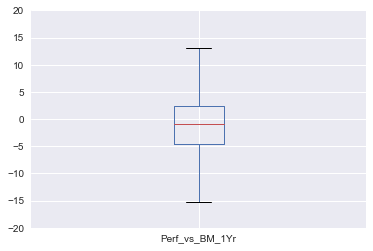

In [50]:
cleandata['Perf_vs_BM_1Yr'].plot(kind='box',ylim=(-20,20))

In [51]:
data.isnull().sum()

Calender_Year_Year End                  0
Name                                    0
Ticker                                  0
Primary_Prospectus_Benchmark            0
#_of_Holdings                           0
Turnover_Ratio                          0
Total_Market_Value                      0
P_B                                     0
P_C                                     0
P_E                                     0
P_S                                     0
Debt_to_Capital                         0
Net_Margin                              0
ROA                                     0
ROE                                     0
Equity_Style_Factor_P_E                 0
Equity_Style_Factor_P_B                 0
Equity_Style_Factor_P_S                 0
Equity_Style_Factor_P_C                 0
Equity_Style_Factor_Div_Yld             0
Equity_Style_Factor_LT_Earn_Growth      0
Equity_Style_Factor_Hist_Earn_Growth    0
Equity_Style_Factor_BV_Growth           0
Equity_Style_Factor_Sales_Growth  

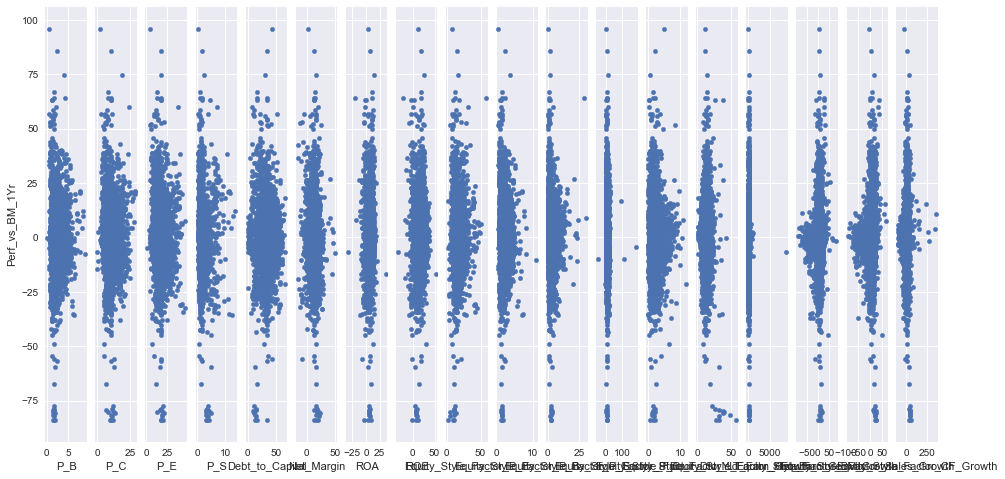

In [53]:
fig, axs = plt.subplots(1, 18, sharey=True)
cleandata.plot(kind='scatter', x='P_B', y='Perf_vs_BM_1Yr', ax=axs[0], figsize=(16, 8))
cleandata.plot(kind='scatter', x='P_C', y='Perf_vs_BM_1Yr', ax=axs[1])
cleandata.plot(kind='scatter', x='P_E', y='Perf_vs_BM_1Yr', ax=axs[2])
cleandata.plot(kind='scatter', x='P_S', y='Perf_vs_BM_1Yr', ax=axs[3])
cleandata.plot(kind='scatter', x='Debt_to_Capital', y='Perf_vs_BM_1Yr', ax=axs[4])
cleandata.plot(kind='scatter', x='Net_Margin', y='Perf_vs_BM_1Yr', ax=axs[5])
cleandata.plot(kind='scatter', x='ROA', y='Perf_vs_BM_1Yr', ax=axs[6])
cleandata.plot(kind='scatter', x='ROE', y='Perf_vs_BM_1Yr', ax=axs[7])
cleandata.plot(kind='scatter', x='Equity_Style_Factor_P_E', y='Perf_vs_BM_1Yr', ax=axs[8])
cleandata.plot(kind='scatter', x='Equity_Style_Factor_P_B', y='Perf_vs_BM_1Yr', ax=axs[9])
cleandata.plot(kind='scatter', x='Equity_Style_Factor_P_S', y='Perf_vs_BM_1Yr', ax=axs[10])
cleandata.plot(kind='scatter', x='Equity_Style_Factor_P_C', y='Perf_vs_BM_1Yr', ax=axs[11])
cleandata.plot(kind='scatter', x='Equity_Style_Factor_Div_Yld', y='Perf_vs_BM_1Yr', ax=axs[12])
cleandata.plot(kind='scatter', x='Equity_Style_Factor_LT_Earn_Growth', y='Perf_vs_BM_1Yr', ax=axs[13])
cleandata.plot(kind='scatter', x='Equity_Style_Factor_Hist_Earn_Growth', y='Perf_vs_BM_1Yr', ax=axs[14])
cleandata.plot(kind='scatter', x='Equity_Style_Factor_BV_Growth', y='Perf_vs_BM_1Yr', ax=axs[15])
cleandata.plot(kind='scatter', x='Equity_Style_Factor_Sales_Growth', y='Perf_vs_BM_1Yr', ax=axs[16])
cleandata.plot(kind='scatter', x='Equity_Style_Factor_CF_Growth', y='Perf_vs_BM_1Yr', ax=axs[17])

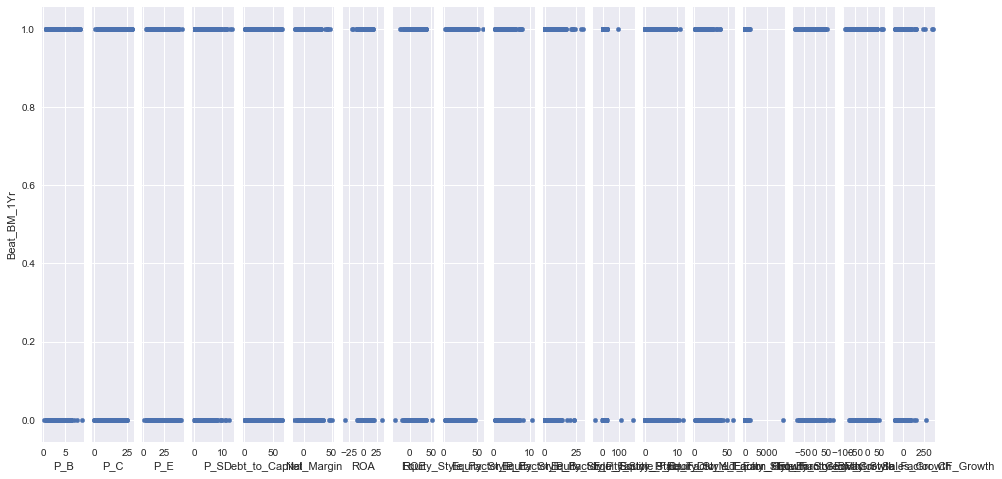

In [54]:
fig, axs = plt.subplots(1, 18, sharey=True)
cleandata.plot(kind='scatter', x='P_B', y='Beat_BM_1Yr', ax=axs[0], figsize=(16, 8))
cleandata.plot(kind='scatter', x='P_C', y='Beat_BM_1Yr', ax=axs[1])
cleandata.plot(kind='scatter', x='P_E', y='Beat_BM_1Yr', ax=axs[2])
cleandata.plot(kind='scatter', x='P_S', y='Beat_BM_1Yr', ax=axs[3])
cleandata.plot(kind='scatter', x='Debt_to_Capital', y='Beat_BM_1Yr', ax=axs[4])
cleandata.plot(kind='scatter', x='Net_Margin', y='Beat_BM_1Yr', ax=axs[5])
cleandata.plot(kind='scatter', x='ROA', y='Beat_BM_1Yr', ax=axs[6])
cleandata.plot(kind='scatter', x='ROE', y='Beat_BM_1Yr', ax=axs[7])
cleandata.plot(kind='scatter', x='Equity_Style_Factor_P_E', y='Beat_BM_1Yr', ax=axs[8])
cleandata.plot(kind='scatter', x='Equity_Style_Factor_P_B', y='Beat_BM_1Yr', ax=axs[9])
cleandata.plot(kind='scatter', x='Equity_Style_Factor_P_S', y='Beat_BM_1Yr', ax=axs[10])
cleandata.plot(kind='scatter', x='Equity_Style_Factor_P_C', y='Beat_BM_1Yr', ax=axs[11])
cleandata.plot(kind='scatter', x='Equity_Style_Factor_Div_Yld', y='Beat_BM_1Yr', ax=axs[12])
cleandata.plot(kind='scatter', x='Equity_Style_Factor_LT_Earn_Growth', y='Beat_BM_1Yr', ax=axs[13])
cleandata.plot(kind='scatter', x='Equity_Style_Factor_Hist_Earn_Growth', y='Beat_BM_1Yr', ax=axs[14])
cleandata.plot(kind='scatter', x='Equity_Style_Factor_BV_Growth', y='Beat_BM_1Yr', ax=axs[15])
cleandata.plot(kind='scatter', x='Equity_Style_Factor_Sales_Growth', y='Beat_BM_1Yr', ax=axs[16])
cleandata.plot(kind='scatter', x='Equity_Style_Factor_CF_Growth', y='Beat_BM_1Yr', ax=axs[17])

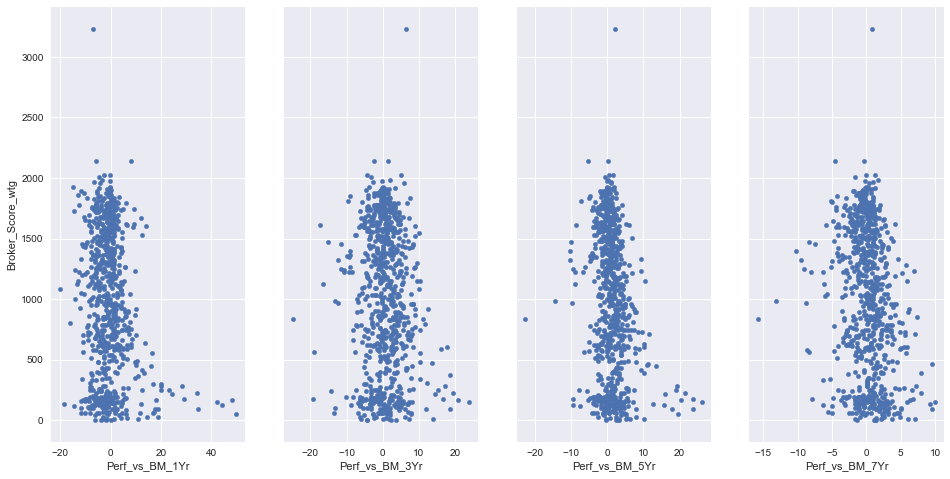

In [158]:
fig, axs = plt.subplots(1, 4, sharey=True)
cleandata.plot(kind='scatter', x='Perf_vs_BM_1Yr', y='Broker_Score_wtg', ax=axs[0], figsize=(16, 8))
cleandata.plot(kind='scatter', x='Perf_vs_BM_3Yr', y='Broker_Score_wtg', ax=axs[1])
cleandata.plot(kind='scatter', x='Perf_vs_BM_5Yr', y='Broker_Score_wtg', ax=axs[2])
cleandata.plot(kind='scatter', x='Perf_vs_BM_7Yr', y='Broker_Score_wtg', ax=axs[3])


                      P_B       P_C       P_E       P_S  Debt_to_Capital  \
P_B              1.000000  0.783564  0.626861  0.578226        -0.162571   
P_C              0.783564  1.000000  0.752058  0.641284        -0.167139   
P_E              0.626861  0.752058  1.000000  0.604609         0.012334   
P_S              0.578226  0.641284  0.604609  1.000000        -0.115850   
Debt_to_Capital -0.162571 -0.167139  0.012334 -0.115850         1.000000   
Net_Margin       0.221436  0.165779 -0.086612  0.312532        -0.134277   
ROA              0.304551  0.158365 -0.129622 -0.074638        -0.228720   
ROE              0.324809  0.078657 -0.212895 -0.099676        -0.004549   

                 Net_Margin       ROA       ROE  
P_B                0.221436  0.304551  0.324809  
P_C                0.165779  0.158365  0.078657  
P_E               -0.086612 -0.129622 -0.212895  
P_S                0.312532 -0.074638 -0.099676  
Debt_to_Capital   -0.134277 -0.228720 -0.004549  
Net_Margin     

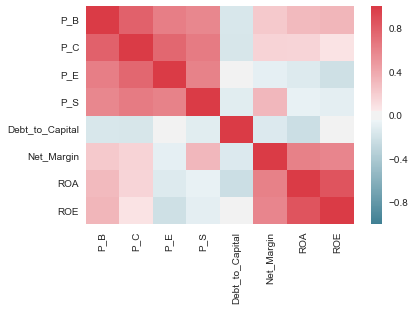

In [55]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
columns_to_keep = ['P_B', 'P_C', 'P_E', 'P_S','Debt_to_Capital', 'Net_Margin', 'ROA', 'ROE']
correlations = cleandata[columns_to_keep].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)

                                      Equity_Style_Factor_P_E  \
Equity_Style_Factor_P_E                              1.000000   
Equity_Style_Factor_P_B                              0.549525   
Equity_Style_Factor_P_S                              0.317880   
Equity_Style_Factor_P_C                              0.477177   
Equity_Style_Factor_Div_Yld                         -0.378597   
Equity_Style_Factor_LT_Earn_Growth                   0.186248   
Equity_Style_Factor_Hist_Earn_Growth                 0.004177   
Equity_Style_Factor_BV_Growth                        0.153172   
Equity_Style_Factor_Sales_Growth                     0.119745   
Equity_Style_Factor_CF_Growth                        0.116841   

                                      Equity_Style_Factor_P_B  \
Equity_Style_Factor_P_E                              0.549525   
Equity_Style_Factor_P_B                              1.000000   
Equity_Style_Factor_P_S                              0.285110   
Equity_Style_Factor_P_C 

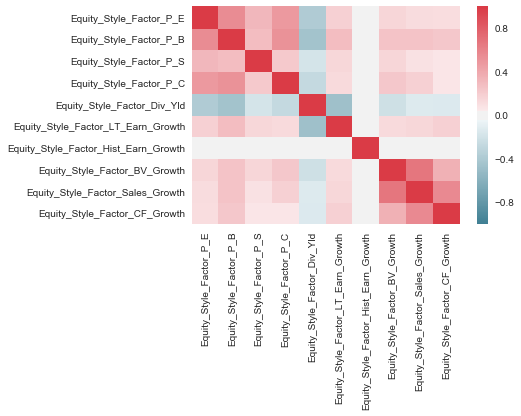

In [57]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
columns_to_keep = ['Equity_Style_Factor_P_E', 'Equity_Style_Factor_P_B', 'Equity_Style_Factor_P_S','Equity_Style_Factor_P_C',\
                   'Equity_Style_Factor_Div_Yld', 'Equity_Style_Factor_LT_Earn_Growth', 'Equity_Style_Factor_Hist_Earn_Growth'\
                   , 'Equity_Style_Factor_BV_Growth', 'Equity_Style_Factor_Sales_Growth','Equity_Style_Factor_CF_Growth']
correlations = cleandata[columns_to_keep].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)

                      P_E  Debt_to_Capital  Net_Margin       ROE
P_E              1.000000         0.012334   -0.086612 -0.212895
Debt_to_Capital  0.012334         1.000000   -0.134277 -0.004549
Net_Margin      -0.086612        -0.134277    1.000000  0.593467
ROE             -0.212895        -0.004549    0.593467  1.000000
Axes(0.125,0.125;0.62x0.755)


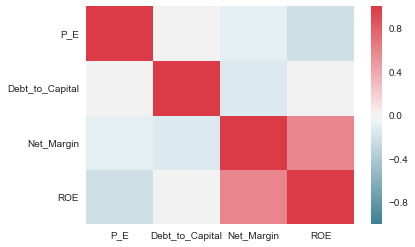

In [58]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
columns_to_keep = ['P_E','Debt_to_Capital', 'Net_Margin','ROE']
correlations = cleandata[columns_to_keep].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)

                                      Equity_Style_Factor_P_E  \
Equity_Style_Factor_P_E                              1.000000   
Equity_Style_Factor_P_S                              0.317880   
Equity_Style_Factor_P_C                              0.477177   
Equity_Style_Factor_Div_Yld                         -0.378597   
Equity_Style_Factor_LT_Earn_Growth                   0.186248   
Equity_Style_Factor_Hist_Earn_Growth                 0.004177   
Equity_Style_Factor_Sales_Growth                     0.119745   
Equity_Style_Factor_CF_Growth                        0.116841   

                                      Equity_Style_Factor_P_S  \
Equity_Style_Factor_P_E                              0.317880   
Equity_Style_Factor_P_S                              1.000000   
Equity_Style_Factor_P_C                              0.221798   
Equity_Style_Factor_Div_Yld                         -0.185610   
Equity_Style_Factor_LT_Earn_Growth                   0.144325   
Equity_Style_Factor_Hist

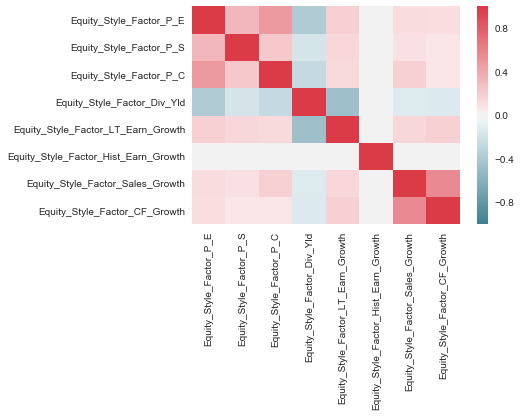

In [64]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
columns_to_keep = ['Equity_Style_Factor_P_E', 'Equity_Style_Factor_P_S','Equity_Style_Factor_P_C',\
                   'Equity_Style_Factor_Div_Yld', 'Equity_Style_Factor_LT_Earn_Growth', 'Equity_Style_Factor_Hist_Earn_Growth'\
                   , 'Equity_Style_Factor_Sales_Growth','Equity_Style_Factor_CF_Growth']
correlations = cleandata[columns_to_keep].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)

In [65]:
cleandata.describe()

,Calender_Year_Year End,P_B,P_C,P_E,P_S,Debt_to_Capital,Net_Margin,ROA,ROE,Equity_Style_Factor_P_E,...,Equity_Style_Factor_Div_Yld,Equity_Style_Factor_LT_Earn_Growth,Equity_Style_Factor_Hist_Earn_Growth,Equity_Style_Factor_BV_Growth,Equity_Style_Factor_Sales_Growth,Equity_Style_Factor_CF_Growth,1Yr_Return,1Yr_Return_BM,Beat_BM_1Yr,Perf_vs_BM_1Yr
count,9271.000000,9271.000000,9271.000000,9271.000000,9271.000000,9271.000000,9271.000000,9271.000000,9271.000000,9271.000000,...,9271.000000,9271.000000,9271.000000,9271.000000,9271.000000,9271.000000,9271.000000,9271.000000,9271.000000,9271.000000
mean,2010.177111,2.395142,10.175625,16.840132,1.487014,32.431430,11.985742,7.216263,17.313277,15.303605,...,2.135116,11.701536,10.738695,4.159989,2.875557,5.814945,8.137690,8.985077,0.392191,-0.847388
std,3.114139,0.837033,3.083662,4.524226,0.907717,7.749081,4.251060,3.117045,5.984167,4.009736,...,1.115843,2.916580,97.117877,9.972686,11.659311,15.479938,20.653768,18.938981,0.488265,9.521042
min,2005.000000,0.220000,0.000000,1.470000,0.100000,0.000000,-16.810000,-33.760000,-34.750000,1.340000,...,0.000000,1.320000,-87.340000,-87.210000,-90.570000,-92.550000,-68.120000,-53.330000,0.000000,-83.800000
25%,2008.000000,1.830000,8.130000,14.185000,1.030000,28.650000,9.820000,5.690000,14.040000,12.930000,...,1.440000,9.990000,1.690000,2.000000,0.130000,1.425000,-0.480000,1.380000,0.000000,-4.665000
50%,2010.000000,2.260000,10.080000,16.780000,1.330000,33.180000,12.460000,7.530000,18.182967,15.030000,...,2.030000,11.300000,8.770000,5.910000,5.070000,6.810000,10.290000,13.690000,0.000000,-0.910000
75%,2013.000000,2.810000,11.645000,18.905000,1.680000,36.330000,14.160000,9.120000,21.200000,17.040000,...,2.640000,12.970000,15.790000,9.030000,9.020000,11.815000,19.280000,17.320000,1.000000,2.420000
max,2015.000000,8.900000,28.900000,46.530000,13.440000,66.420000,51.270000,35.420000,52.440000,57.540000,...,11.630000,57.730000,8893.470000,80.520000,65.200000,360.560000,122.280000,78.510000,1.000000,95.820000


In [37]:
#cleandata.isnull().sum()

# Logistic Regression

In [66]:
lm = LogisticRegression()

lm.fit(cleandata[['P_E','Debt_to_Capital', 'Net_Margin','ROE','Equity_Style_Factor_P_E', 'Equity_Style_Factor_P_S',\
                  'Equity_Style_Factor_P_C','Equity_Style_Factor_Div_Yld', 'Equity_Style_Factor_LT_Earn_Growth',\
                  'Equity_Style_Factor_Hist_Earn_Growth', 'Equity_Style_Factor_Sales_Growth',\
                  'Equity_Style_Factor_CF_Growth']], cleandata['Beat_BM_1Yr'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [67]:
print np.exp(lm.coef_)
print np.exp(lm.intercept_)
print cleandata.Beat_BM_1Yr.mean()

[[ 0.9655827   0.98917312  0.97611735  0.9906727   1.03063944  1.06750942
   0.98141473  1.06525172  1.0296589   1.00005506  1.00813791  1.00423092]]
[ 1.00247312]
0.39219070219


In [71]:
feature_set = cleandata[['P_E','Debt_to_Capital', 'Net_Margin','ROE','Equity_Style_Factor_P_E', \
                         'Equity_Style_Factor_P_S','Equity_Style_Factor_P_C','Equity_Style_Factor_Div_Yld', \
                         'Equity_Style_Factor_LT_Earn_Growth','Equity_Style_Factor_Hist_Earn_Growth', \
                         'Equity_Style_Factor_Sales_Growth','Equity_Style_Factor_CF_Growth']]
print lm.score(feature_set, cleandata['Beat_BM_1Yr'])

0.610398015317


In [ ]:
#The accuracy of the model with all features (removing one rank) is ~61%.

In [72]:
roc_auc_score(cleandata['Beat_BM_1Yr'], lm.predict(feature_set))

0.51369102526934152

# Logistic Regression using Grid Search

In [79]:
#Grid Search with Logistic Regression

datafactors = cleandata[['P_E','Debt_to_Capital', 'Net_Margin','ROE','Equity_Style_Factor_P_E', \
                         'Equity_Style_Factor_P_S','Equity_Style_Factor_P_C','Equity_Style_Factor_Div_Yld', \
                         'Equity_Style_Factor_LT_Earn_Growth','Equity_Style_Factor_Hist_Earn_Growth', \
                         'Equity_Style_Factor_Sales_Growth','Equity_Style_Factor_CF_Growth']]

sc = StandardScaler()
scaled_feature = sc.fit_transform(datafactors)
gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [i for i in range(1, 10)], 'class_weight': [None, 'auto']},
    cv=cross_validation.KFold(n=len(cleandata), n_folds=5),
    scoring='recall'
)

gs.fit(scaled_feature, cleandata.Beat_BM_1Yr)
print ('Best Scores:',gs.grid_scores_)
print('Best 1Yr Score:', gs.best_score_) 

/Users/michaeltong/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/michaeltong/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/michaeltong/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/michaeltong/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated

('Best Scores:', [mean: 0.05384, std: 0.03640, params: {'C': 1, 'class_weight': None}, mean: 0.42507, std: 0.18152, params: {'C': 1, 'class_weight': 'auto'}, mean: 0.05384, std: 0.03640, params: {'C': 2, 'class_weight': None}, mean: 0.42563, std: 0.18153, params: {'C': 2, 'class_weight': 'auto'}, mean: 0.05384, std: 0.03640, params: {'C': 3, 'class_weight': None}, mean: 0.42563, std: 0.18153, params: {'C': 3, 'class_weight': 'auto'}, mean: 0.05384, std: 0.03640, params: {'C': 4, 'class_weight': None}, mean: 0.42563, std: 0.18153, params: {'C': 4, 'class_weight': 'auto'}, mean: 0.05384, std: 0.03640, params: {'C': 5, 'class_weight': None}, mean: 0.42563, std: 0.18153, params: {'C': 5, 'class_weight': 'auto'}, mean: 0.05384, std: 0.03640, params: {'C': 6, 'class_weight': None}, mean: 0.42563, std: 0.18153, params: {'C': 6, 'class_weight': 'auto'}, mean: 0.05384, std: 0.03640, params: {'C': 7, 'class_weight': None}, mean: 0.42563, std: 0.18153, params: {'C': 7, 'class_weight': 'auto'}, me

/Users/michaeltong/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)


* Estimator with gave highest score

In [81]:
print('Best 1Yr Estimator:', gs.best_estimator_)

('Best 1Yr Estimator:', LogisticRegression(C=2, class_weight='auto', dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))


* 1 Year Performance Results

In [85]:
print('Best 1Yr Score:', gs.best_score_)
print('Best 1Yr Parameter:', gs.best_params_)
zip(['P_E','Debt_to_Capital', 'Net_Margin','ROE','Equity_Style_Factor_P_E','Equity_Style_Factor_P_S',\
     'Equity_Style_Factor_P_C','Equity_Style_Factor_Div_Yld', 'Equity_Style_Factor_LT_Earn_Growth',\
     'Equity_Style_Factor_Hist_Earn_Growth','Equity_Style_Factor_Sales_Growth',\
     'Equity_Style_Factor_CF_Growth'],gs.best_estimator_.coef_[0])

('Best 1Yr Score:', 0.42562897526986154)
('Best 1Yr Parameter:', {'C': 2, 'class_weight': 'auto'})


[('P_E', -0.15835986771192834),
 ('Debt_to_Capital', -0.082783380258586878),
 ('Net_Margin', -0.10093386909939085),
 ('ROE', -0.056799647246019963),
 ('Equity_Style_Factor_P_E', 0.12258565887789397),
 ('Equity_Style_Factor_P_S', 0.10432207884948368),
 ('Equity_Style_Factor_P_C', -0.071585656865833514),
 ('Equity_Style_Factor_Div_Yld', 0.077031897468725907),
 ('Equity_Style_Factor_LT_Earn_Growth', 0.095285952559955381),
 ('Equity_Style_Factor_Hist_Earn_Growth', 0.0075486341212492123),
 ('Equity_Style_Factor_Sales_Growth', 0.092531100151800327),
 ('Equity_Style_Factor_CF_Growth', 0.060864653231443827)]

# Random Forest

In [93]:
rfdata = cleandata[['P_E','Debt_to_Capital', 'Net_Margin','ROE','Equity_Style_Factor_P_E','Equity_Style_Factor_P_S', \
     'Equity_Style_Factor_P_C','Equity_Style_Factor_Div_Yld', 'Equity_Style_Factor_LT_Earn_Growth', \
     'Equity_Style_Factor_Hist_Earn_Growth', 'Equity_Style_Factor_Sales_Growth', \
     'Equity_Style_Factor_CF_Growth','Beat_BM_1Yr']]

In [94]:
rfdata.shape

(9271, 13)

In [95]:
rfdata.dtypes

P_E                                     float64
Debt_to_Capital                         float64
Net_Margin                              float64
ROE                                     float64
Equity_Style_Factor_P_E                 float64
Equity_Style_Factor_P_S                 float64
Equity_Style_Factor_P_C                 float64
Equity_Style_Factor_Div_Yld             float64
Equity_Style_Factor_LT_Earn_Growth      float64
Equity_Style_Factor_Hist_Earn_Growth    float64
Equity_Style_Factor_Sales_Growth        float64
Equity_Style_Factor_CF_Growth           float64
Beat_BM_1Yr                               int64
dtype: object

In [96]:
rfdata.head()

,P_E,Debt_to_Capital,Net_Margin,ROE,Equity_Style_Factor_P_E,Equity_Style_Factor_P_S,Equity_Style_Factor_P_C,Equity_Style_Factor_Div_Yld,Equity_Style_Factor_LT_Earn_Growth,Equity_Style_Factor_Hist_Earn_Growth,Equity_Style_Factor_Sales_Growth,Equity_Style_Factor_CF_Growth,Beat_BM_1Yr
0,15.00,3.98,12.48,18.06,13.53,1.01,5.10,2.72,12.59,18.78,6.66,-14.86,0
1,16.41,2.75,11.94,17.62,16.60,1.46,11.52,3.81,13.09,22.45,1.73,1.48,0
2,18.89,22.32,12.47,17.74,16.89,2.42,7.55,1.55,10.45,18.01,7.00,16.96,0
3,21.07,7.24,11.00,17.58,17.36,1.41,10.62,1.79,13.20,22.26,5.39,10.78,0
4,13.85,7.01,7.82,16.86,13.32,0.92,5.89,2.20,10.73,12.12,-4.04,5.15,1


In [97]:
#split data into train and test set
rfdata['train'] = np.random.uniform(0, 1, len(rfdata)) <= .75

/Users/michaeltong/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [98]:
train, test = rfdata[rfdata['train']==True], rfdata[rfdata['train']==False]

In [99]:
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

('Number of observations in the training data:', 6949)
('Number of observations in the test data:', 2322)


In [100]:
features = rfdata.columns[:12]
features

Index([u'P_E', u'Debt_to_Capital', u'Net_Margin', u'ROE',
       u'Equity_Style_Factor_P_E', u'Equity_Style_Factor_P_S',
       u'Equity_Style_Factor_P_C', u'Equity_Style_Factor_Div_Yld',
       u'Equity_Style_Factor_LT_Earn_Growth',
       u'Equity_Style_Factor_Hist_Earn_Growth',
       u'Equity_Style_Factor_Sales_Growth', u'Equity_Style_Factor_CF_Growth'],
      dtype='object')

In [101]:
clf = RandomForestClassifier(n_jobs=2)

clf.fit(train[features], train.Beat_BM_1Yr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [102]:
scoreclf = clf.score(train[features], train.Beat_BM_1Yr)
print scoreclf

scoreclfT = clf.score(test[features], test.Beat_BM_1Yr)
print scoreclfT

0.981148366671
0.65503875969


In [103]:
clf.predict(test[features])

array([0, 0, 0, ..., 0, 0, 0])

In [104]:
clf.predict_proba(test[features])[0:10]

array([[ 1. ,  0. ],
       [ 0.7,  0.3],
       [ 0.7,  0.3],
       [ 0.5,  0.5],
       [ 0.3,  0.7],
       [ 0.5,  0.5],
       [ 0.3,  0.7],
       [ 0.9,  0.1],
       [ 0.4,  0.6],
       [ 0.7,  0.3]])

In [105]:
list(zip(train[features], clf.feature_importances_))

[('P_E', 0.079956515974794889),
 ('Debt_to_Capital', 0.086021324923637718),
 ('Net_Margin', 0.083012137328098895),
 ('ROE', 0.08022932952997433),
 ('Equity_Style_Factor_P_E', 0.080221140201583205),
 ('Equity_Style_Factor_P_S', 0.086586555893075054),
 ('Equity_Style_Factor_P_C', 0.084815840337734108),
 ('Equity_Style_Factor_Div_Yld', 0.079455930658461876),
 ('Equity_Style_Factor_LT_Earn_Growth', 0.092653057040349748),
 ('Equity_Style_Factor_Hist_Earn_Growth', 0.086741873019140686),
 ('Equity_Style_Factor_Sales_Growth', 0.083282591240523118),
 ('Equity_Style_Factor_CF_Growth', 0.077023703852626413)]

In [106]:
factors = train[features].columns

features_df = pd.DataFrame({'Factors': features, 'Importance Score': clf.feature_importances_})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head()

,Factors,Importance Score
8,Equity_Style_Factor_LT_Earn_Growth,0.092653
9,Equity_Style_Factor_Hist_Earn_Growth,0.086742
5,Equity_Style_Factor_P_S,0.086587
1,Debt_to_Capital,0.086021
6,Equity_Style_Factor_P_C,0.084816
